<a href="https://colab.research.google.com/github/a-y-a-n-das/Abalone-Age-Predictor-LR-Model/blob/main/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv("abalone.data")


In [6]:
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_weight",
    "Shucked_weight",
    "Viscera_weight",
    "Shell_weight",
    "Rings"
]
df.columns = cols

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5


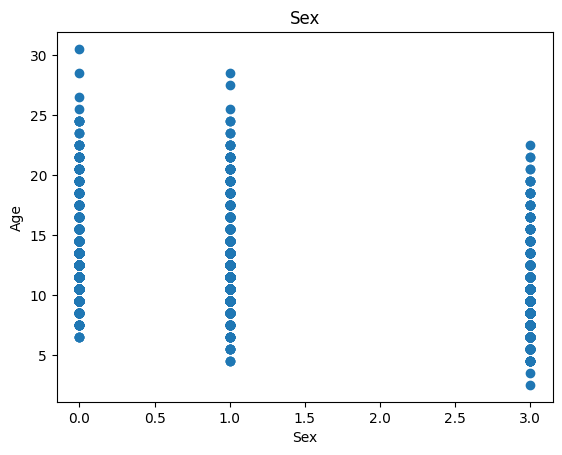

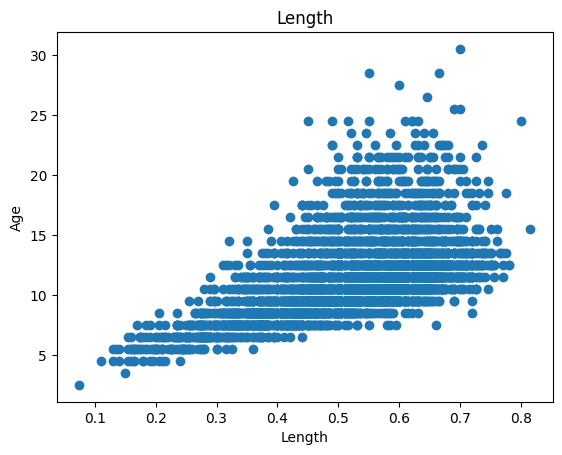

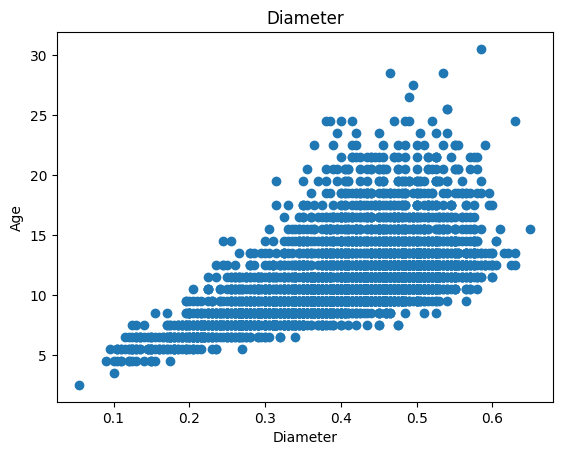

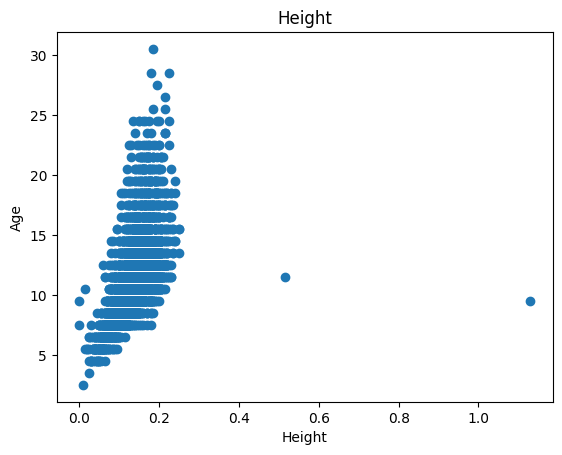

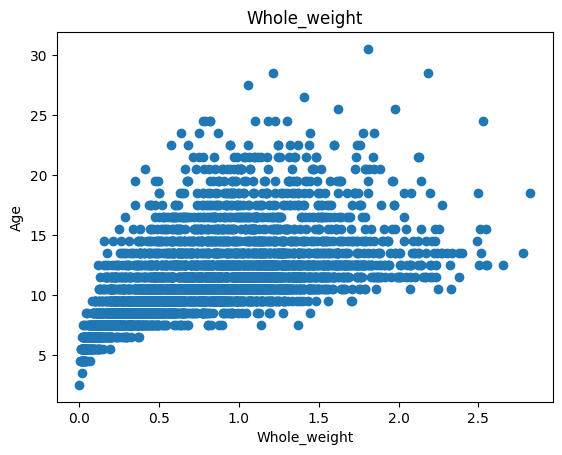

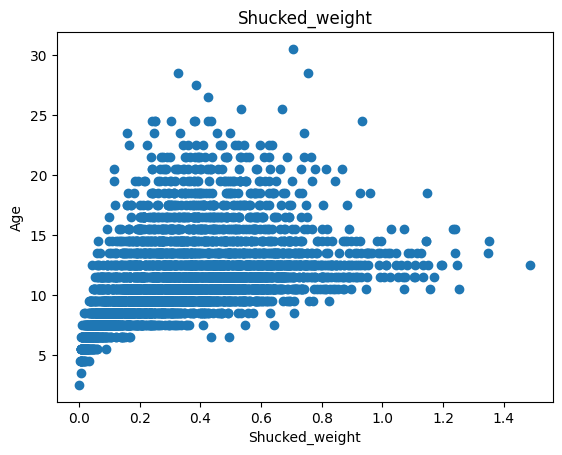

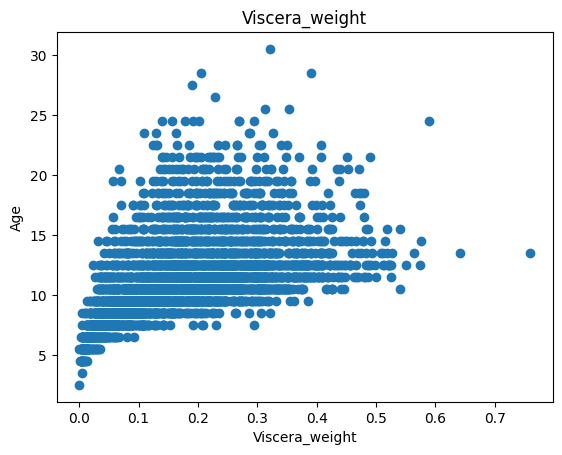

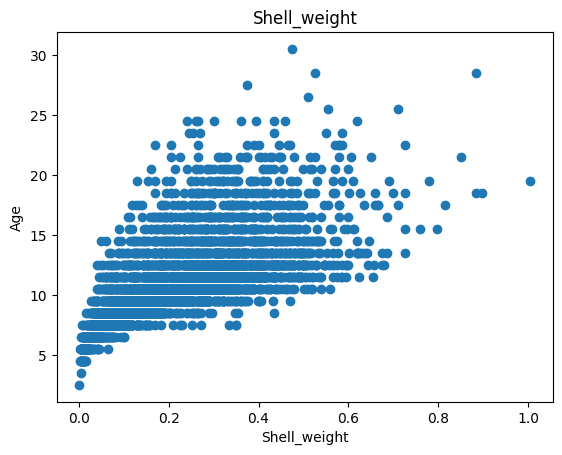

In [23]:
for label in df.columns[:-1]:
  plt.scatter(df[label], df["Age"])
  plt.title(label)
  plt.ylabel("Age")
  plt.xlabel(label)
  plt.show()

In [30]:
X = df.drop(columns=["Age"])  # Features: All columns except 'Age'
y = df["Age"]                 # Target: Age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 4.79
R-squared Score: 0.57


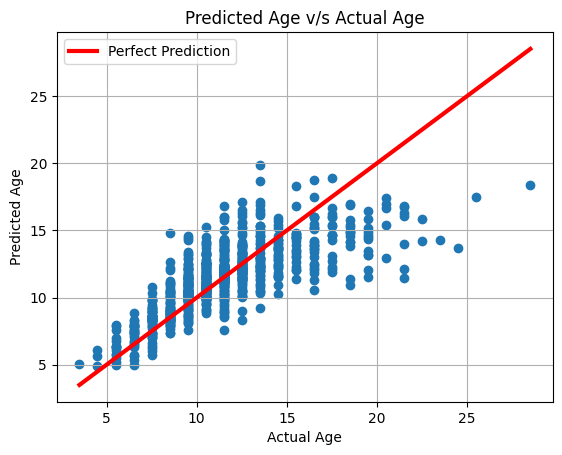

In [43]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=3,linestyle='solid', label="Perfect Prediction")
plt.title("Predicted Age v/s Actual Age")
plt.ylabel("Predicted Age")
plt.xlabel("Actual Age")
plt.legend()
plt.grid()
plt.show()